
# Project: Twitter WeRateDogs Data Wrangling
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Introduction:
Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. Data will be gathered from WeRateDogs, tweet image prediction and Twitter likes and retweets.

In [710]:

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Gathering Data

#### 1. WeRateDogs archive twitter Data:

In [932]:
t_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [409]:
pd.set_option('max_colwidth',280)
t_archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### 2. Tweet image predictions


In [784]:
import requests
import os


prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(prediction_url)

with open(os.path.abspath(prediction_url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)


In [785]:
image_predict_df = pd.read_csv('image-predictions.tsv',delimiter='\t')

In [786]:
image_predict_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1123,727175381690781696,https://pbs.twimg.com/media/ChdyJvdWwAA5HGd.jpg,2,flat-coated_retriever,0.656463,True,Great_Dane,0.084766,True,Labrador_retriever,0.058909,True
1416,771136648247640064,https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg,1,bathtub,0.368660,False,golden_retriever,0.297402,True,tub,0.201711,False
642,681339448655802368,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,seat_belt,0.532441,False,Labrador_retriever,0.094615,True,kuvasz,0.089863,True
39,666649482315059201,https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg,1,Border_collie,0.447803,True,English_springer,0.170497,True,collie,0.139206,True
590,679148763231985668,https://pbs.twimg.com/media/CWzSMmAWsAAyB1u.jpg,1,Italian_greyhound,0.302685,True,hair_slide,0.124281,False,Afghan_hound,0.059846,True


#### 3. Likes and Retweet of the Tweets from Twitter:

In [ ]:
import tweepy

consumer_key = 'xxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [ ]:
import json
from timeit import default_timer as timer 

tweet_errors = []
data= []
for tweetid in t_archive_df.tweet_id:
    try:
        rank = t_archive_df.tweet_id[t_archive_df.tweet_id==tweetid].index[0]
        start = timer()
        tweet_status = api.get_status(tweetid,tweet_mode='extended')
        data.append({
            'tweet_id':tweet_status._json['id'],
            'favorite_count':tweet_status._json['favorite_count'],
            'retweet_count':tweet_status._json['retweet_count']
        })
        end = timer()
        print("Download completed for "+str(tweetid)+" rank="+str(rank)+" took "+str(end-start))
    except Exception as e:
        print('Rank='+str(rank)+' Tweet id: '+str(tweetid)+' Error: '+ str(e))
        tweet_errors.append(str(rank)+"_"+str(tweetid))

with open('tweet_json.txt', 'w') as outfile:  
    json.dump(data, outfile)

#### As the print out of the above is too long, I removed the print out and pasted the code only.

In [901]:
import json

#from dictionary to df

with open('tweet_json.txt','r') as infile:
    tweet_likes_df = pd.DataFrame(json.load(infile))
    

In [617]:

tweet_likes_df.sample(5)


,favorite_count,retweet_count,tweet_id
1038,4508,1449,742161199639494656
1188,3841,1499,715758151270801409
444,12937,2796,818145370475810820
1193,5644,1647,715360349751484417
138,20425,4122,863907417377173506


### ASSESS THE DATA

#### Both tweet_likes_df and image_predict_df are derived data, so their data quality should be good


##### Quality Issues of t_archive_df:
1. Retweets can be removed as they are the duplicate of some other tweets
2. Missing records in these columns:  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, 
3. the "source" column contains data that is seems not very meaningful for further analysis.
4. "rating_denominator" column contains incorrect data 
5. "rating_numerator" column contains incorrect data 
6. "name" column contains invalid names
7. Missing records in expanded_urls
8. The "expanded_url" column contains records with values made up of mulitple duplicate urls.



#### Tidiness issues
1. In t_archive_df, both the "text" & "expanded_urls" columns contain the url of the tweet. The url should be removed from the "text" column.
2. In t_archive_df, the dog stages data should be in 1 column rather than 4 columns
3. For image_predict_df, there are 3 prediction of the dog breed, and the prediction can be either a dog breed or something else, depending on what the logic can predict based on the image used. To keep meaningful data related to only the dog breed with highest confident prediction, data wrangling will be performed on this dataframe to keep it tidy.
4. Information about one type of observational unit (tweets) spreads across three different dataframes. Therefore, these three dataframes should be merged as they are part of the same observational unit.


#### Assessing image_predict_df

In [400]:
image_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [401]:
#The output shows that there is No duplicated records for this dataframe
image_predict_df[image_predict_df.duplicated(['tweet_id'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [787]:
image_predict_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1032,711652651650457602,https://pbs.twimg.com/media/CeBMT6-WIAA7Qqf.jpg,1,llama,0.856789,False,Arabian_camel,0.098727,False,neck_brace,0.016377,False
606,679877062409191424,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,1,hog,0.809466,False,hay,0.060178,False,lumbermill,0.016483,False
912,700847567345688576,https://pbs.twimg.com/media/CbnpI_1XIAAiRAz.jpg,1,Rhodesian_ridgeback,0.252514,True,redbone,0.153005,True,whippet,0.135199,True
583,678800283649069056,https://pbs.twimg.com/media/CWuVQSLW4AAI3w9.jpg,1,Labrador_retriever,0.213673,True,beagle,0.146235,True,Airedale,0.122701,True
1461,778286810187399168,https://pbs.twimg.com/media/Cs0HuUTWcAUpSE8.jpg,1,Boston_bull,0.322070,True,pug,0.229903,True,muzzle,0.101420,False


#### This dataframe quality is fine. However, there are 3 prediction of the dog breed, and the prediction can be either a dog breed or something else, depending on what the logic can predict based on the image used. To keep meaningful data related to only the dog breed with highest confident prediction, data wrangling will be performed on this dataframe to keep it tidy.

#### Assessing the tweet_likes_df dataframe

In [406]:
tweet_likes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 4 columns):
favorite_count    2337 non-null int64
ranking           2337 non-null int64
retweet_count     2337 non-null int64
tweet_id          2337 non-null int64
dtypes: int64(4)
memory usage: 73.1 KB


In [407]:
#The output shows that there is No duplicated records for this dataframe
tweet_likes_df[tweet_likes_df.duplicated(['tweet_id'])]

,favorite_count,ranking,retweet_count,tweet_id


#### Assessing the t_archive_df

In [322]:
t_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [69]:
t_archive_df[t_archive_df.duplicated(['tweet_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### The result above shows that there is no duplicated records in tweet_id column

In [798]:
#Assessing the Retweet Tweets
t_archive_df[t_archive_df.retweeted_status_id.isnull() == False].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
669,790227638568808452,NaN,NaN,2016-10-23 16:25:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Leela. She's a Fetty Woof. Lost eye while saving a baby from an avalanche. 11/10 true h*ckin hero https://t.co/2lBg3…,7.626999e+17,4.196984e+09,2016-08-08 17:19:51 +0000,https://twitter.com/dog_rates/status/762699858130116608/photo/1,11,10,Leela,None,None,None,None
406,823719002937630720,NaN,NaN,2017-01-24 02:28:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Balto. He's very content. Legendary tongue slippage. 12/10 would pet forever https://t.co/T7Jr4Gw4sC,7.840579e+17,4.196984e+09,2016-10-06 15:49:14 +0000,"https://vine.co/v/5gKxeUpuKEr,https://vine.co/v/5gKxeUpuKEr",12,10,Balto,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
818,770743923962707968,NaN,NaN,2016-08-30 22:04:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t…,7.392382e+17,4.196984e+09,2016-06-04 23:31:25 +0000,https://twitter.com/dog_rates/status/739238157791694849/video/1,13,10,None,doggo,None,None,None
811,771171053431250945,NaN,NaN,2016-09-01 02:21:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Frankie. He's wearing blush. 11/10 really accents the cheek bones https://t.co/iJABMhVidf,6.733201e+17,4.196984e+09,2015-12-06 01:56:44 +0000,"https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/...",11,10,Frankie,None,None,None,None


#### The Retweets may cause incorrect representation of the data as it's actually the duplicate of another tweet that may or may not exist in the dataframe. Furthermore, the number of Retweets (181) is low, lesser than 10% of the total records , hence can be removed.

In [804]:
#Assessing the values in "source" column
t_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### The above displays show that the data in "source" column is mostly the same, majority is "Twitter for iPhone". This column is not very meaningful to data analytics for insights later on, hence the column can be removed.

In [65]:
t_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

As per WeRateDogs, the rating denominator should be 10 for all their ratings. However, the value counts of column "rating_denominator" above shows that the data seems to be extracted incorrectly.

In [66]:
t_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In general, the rating numerators are greater than 10 though there are exceptions. However, the counts above show that the values maybe incorectly extracted.

In [10]:
t_archive_df.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Daisy          7
Toby           7
Bailey         7
Buddy          7
Scout          6
Jack           6
Rusty          6
Bella          6
Oscar          6
Milo           6
Dave           6
Stanley        6
Jax            6
Koda           6
Leo            6
Oakley         5
            ... 
Goliath        1
Zeus           1
Angel          1
Gordon         1
Lizzie         1
Kane           1
Julio          1
Banjo          1
Pluto          1
Darby          1
Smiley         1
Genevieve      1
Jareld         1
Torque         1
Tilly          1
Sailer         1
Evy            1
Hermione       1
William        1
Ozzie          1
Randall        1
Bobb           1
Beckham        1
Crouton        1
Brandi         1
Anna           1
Brutus         1
Birf          

#### Some names such as "a", "the" and "an" are invalid

### Clean Data

##### Quality Issues of t_archive_df:
1. Retweets can be removed as they are the duplicate of some other tweets
2. Missing records in these columns:  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, 
3. the "source" column contains data that is seems not very meaningful for further analysis.
4. "rating_denominator" column contains incorrect data 
5. "rating_numerator" column contains incorrect data 
6. "name" column contains invalid names
7. Missing records in expanded_urls
8. The "expanded_url" column contains records with values made up of mulitple duplicate urls.



#### Tidiness issues
1. In t_archive_df, both the "text" & "expanded_urls" columns contain the url of the tweet. The url should be removed from the "text" column.
2. In t_archive_df, the dog stages data should be in 1 column rather than 4 columns
3. For image_predict_df, there are 3 prediction of the dog breed, and the prediction can be either a dog breed or something else, depending on what the logic can predict based on the image used. To keep meaningful data related to only the dog breed with highest confident prediction, data wrangling will be performed on this dataframe to keep it tidy.
4. Information about one type of observational unit (tweets) spreads across three different dataframes. Therefore, these three dataframes should be merged as they are part of the same observational unit.


In [962]:
#Copies of the original dataframes of data are made prior to cleaning
clean_t_archive_df = t_archive_df.copy()
clean_image_predict_df = image_predict_df.copy()
clean_tweet_likes_df = tweet_likes_df.copy()


### 1. Define: Remove Retweets which are tweets with retweet_status_id not null

#### Code

In [963]:
clean_t_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [964]:
clean_t_archive_df[clean_t_archive_df.retweeted_status_id.isnull() == False].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Phil. He's an important dog. Can control the seasons. Magical as hell. 12/10 would let him sign my forehead https://…,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,"https://twitter.com/dog_rates/status/694669722378485760/photo/1,https://twitter.com/dog_rates/status/694669722378485760/photo/1",12,10,Phil,None,None,None,None
109,871166179821445120,NaN,NaN,2017-06-04 00:46:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Dawn. She's just checking pup on you. Making sure you're doing okay. 12/10 she's here if you need her https://t.co/X…,8.410770e+17,4.196984e+09,2017-03-13 00:02:39 +0000,https://twitter.com/dog_rates/status/841077006473256960/photo/1,12,10,Dawn,None,None,None,None
530,808134635716833280,NaN,NaN,2016-12-12 02:21:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Milo. I would do terrible things for Milo. 13/10 https://t.co/R6wJyC2Tey,8.011679e+17,4.196984e+09,2016-11-22 20:58:07 +0000,"https://twitter.com/dog_rates/status/801167903437357056/photo/1,https://twitter.com/dog_rates/status/801167903437357056/photo/1",13,10,Milo,None,None,None,None
357,830173239259324417,NaN,NaN,2017-02-10 21:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Kyro. He's a Stratocumulus Flop. Tongue ejects at random. Serious h*ckin condition. Still 12/10 would pet passionate…,8.092201e+17,4.196984e+09,2016-12-15 02:14:29 +0000,"https://twitter.com/dog_rates/status/809220051211603969/photo/1,https://twitter.com/dog_rates/status/809220051211603969/photo/1",12,10,Kyro,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None


In [965]:
#Drop rows that are retweets
clean_t_archive_df.drop(clean_t_archive_df[clean_t_archive_df.retweeted_status_id.isnull() == False].index, axis=0,inplace=True)


#### Test

In [966]:
#The result SHOULD BE 0
clean_t_archive_df[clean_t_archive_df.retweeted_status_id.isnull() == False]['tweet_id'].count()

0

#### 2. Define: Cleaning columns with Null values.
- After removing the Retweets, the retweets related columns are now empty, hence will remove retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
- Will inspect in_reply_to_status_id, in_reply_to_user_id

#### Code

In [967]:
#Accessing the records with not-null in_reply_to_status_id & in_reply_to_user_id to decide how to deal with them
clean_t_archive_df[clean_t_archive_df.in_reply_to_status_id.isnull() == False].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1605,685681090388975616,6.855479e+17,4.196984e+09,2016-01-09 04:34:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Jack deserves another round of applause. If you missed this earlier today I strongly suggest reading it. Wonderful first 14/10 🐶❤️,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
1844,675849018447167488,6.758457e+17,4.196984e+09,2015-12-13 01:25:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dog is being demoted to a 9/10 for not wearing a helmet while riding. Gotta stay safe out there. Thank you,NaN,NaN,NaN,NaN,9,10,None,None,None,None,None
570,801854953262350336,8.018543e+17,1.185634e+07,2016-11-24 18:28:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",.@NBCSports OMG THE TINY HAT I'M GOING TO HAVE TO SAY 11/10 NBC,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None


#### From the display above, the records are replying to some other tweets, but basically they are still tweets, hence, keeping the records. However, only 78 cells of the columns out of 2K+ cell are not-null, hence removing the columns in_reply_to_status_id, in_reply_to_user_id

In [968]:
#Remove replying & retweet-related columns
clean_t_archive_df.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 
                             'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'],
                              inplace=True)


#### Test

In [970]:
clean_t_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### 3. Define: Clean the Tidy issue with the "source" column - will drop it 

#### Code

In [971]:
#The values in "source" column
clean_t_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### The above displays show that the data in "source" column is mostly the same, majority is "Twitter for iPhone". This column is not very meaningful to data analytics for insights later on, hence the column can be removed.

In [972]:
clean_t_archive_df.drop('source',axis=1,inplace=True)

#### Test

In [973]:
#The source column is removed
clean_t_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


#### 4. Define: Clean "text" column

Tidiness issue: The "text" column contains the url which leads to the same site as the url in the "expanded_urls". Hence, will remove the url in the "text" column so that the "text" column contains only text of the tweet.


#### Code

In [974]:
#show that all the tweets with null expanded_urls containing no url in its text.
clean_t_archive_df[clean_t_archive_df.expanded_urls.isnull()].text.map(lambda x: x.find("https")==-1).count()

58

In [975]:
#Find number of tweets with texts do not contain https
clean_t_archive_df[clean_t_archive_df.text.map(lambda x: x.find("https")) == -1].tweet_id.count()

58

In [976]:
#Remove the url from "text" column
clean_t_archive_df['text'] = clean_t_archive_df.text.map(lambda x: x.split('https')[0])

#### Test

In [977]:
#Find number of tweets with texts do not contain https - It should be the number of records in the df, i.e. 2175
clean_t_archive_df[clean_t_archive_df.text.map(lambda x: x.find("https")) == -1].tweet_id.count()

2175

In [978]:
clean_t_archive_df.text.sample(5)

1432                           Meet Blipson. He's a Doowap Hufflepuff. That Ugg is his temporary home while he's struggling with unemployment 11/10 
1490                                                                                                                        "Fuck the system" 10/10 
347     Meet Kuyu. He was trapped in a well for 10 days. Rescued yesterday using a device designed by a local robotics team. 14/10 for all involved 
526                            This is Ito. He'll be your uber driver tonight. Currently adjusting the mirrors. 13/10 incredibly h*ckin responsible 
1525                         This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend 
Name: text, dtype: object

#### 5: Define: Clean the expanded_urls: For rows with null "expanded_urls", the urls will be formed up.


#### Code

In [979]:
# the display of tweet_id and expanded_urls columns show that the expanded_url is formed up by 
#"https://twitter.com/dog_rates/status/" and the tweet_id and "/photo/1"
#Hence, can create the expanded_url from the tweet_id and verify them by accessing the created urls
clean_t_archive_df[['tweet_id','expanded_urls']][:5]

,tweet_id,expanded_urls
0,892420643555336193,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1"


In [980]:
clean_t_archive_df.loc[clean_t_archive_df.expanded_urls.isnull(),'expanded_urls'] = clean_t_archive_df[clean_t_archive_df.expanded_urls.isnull()].tweet_id.map(lambda x: "https://twitter.com/dog_rates/status/"+str(x)+"/photo/1")


#### Test

In [981]:
#Find number of tweets with null expanded_urls - IT SHOULD BE 0
clean_t_archive_df.loc[clean_t_archive_df.expanded_urls.isnull()].tweet_id.count()

0

#### 5.1 Define: Some expanded_urls contain more than 1 url, but they are all the same, hence will just keep the first url in the "expanded_urls" for each row

#### Code

In [982]:
#Keep the first url in the "expanded_urls" 
clean_t_archive_df['expanded_urls'] = clean_t_archive_df.expanded_urls.map(lambda x: x.split(',',1)[0])

#### Test

In [983]:
clean_t_archive_df.expanded_urls.sample(5)

783                                       https://vine.co/v/ijmv0PD0XXD
563     https://twitter.com/dog_rates/status/802572683846291456/photo/1
520     https://twitter.com/dog_rates/status/810254108431155201/photo/1
1826    https://twitter.com/dog_rates/status/676440007570247681/photo/1
1170    https://twitter.com/dog_rates/status/720775346191278080/photo/1
Name: expanded_urls, dtype: object

#### 6. Clean "rating_numerator" & "rating_denominator" columns which contain incorrect data
Few issues:
- The rating_numerator can be a decimal number. However, the type of rating_numerator is now integer, will need to convert it to float
- The tweet text may contain more than 1 ratings as the picture contains more than 1 dog
- the tweet text may contain 1 fraction for rating while the other "fraction" maybe date, will filter such tweets out and manually fix the issue
- Though the rating_denominator can be > 10, but it worth double-checking those that are > 10 to verify

#### 6.1 Define: The rating_numerator can be a decimal number. However, the type of rating_numerator is now integer, will need to convert it to float

#### Code

In [984]:
clean_t_archive_df['rating_numerator'] = clean_t_archive_df['rating_numerator'].astype(float)

#### Test

In [985]:
#Verify the type of rating_numerator value
type(clean_t_archive_df.rating_numerator[0])

numpy.float64

#### 6.2 Define: There are tweets with decimal rating numerator, will use the string extract function to extract the rating numerator

#### Code

In [1036]:
#Extract ratings
ratings = clean_t_archive_df.text.str.extract('(?P<num>(?:\d+\.)?\d+)\/(?P<deno>\d+)')

In [1037]:
clean_t_archive_df.loc[:,'rating_numerator'] = ratings['num']

In [1059]:
clean_t_archive_df['rating_numerator'] = clean_t_archive_df['rating_numerator'].astype(float)

#### Test
The below shows that the change has been applied as expected

In [1060]:
ratings['num'].head(10)

0    13
1    13
2    12
3    13
4    12
5    13
6    13
7    13
8    13
9    14
Name: num, dtype: object

In [1061]:
clean_t_archive_df.rating_numerator.head(10)

0    13.0
1    13.0
2    12.0
3    13.0
4    12.0
5    13.0
6    13.0
7    13.0
8    13.0
9    14.0
Name: rating_numerator, dtype: float64

#### 6.3 Define: The tweet text may contain more than 1 ratings as the picture contains more than 1 dog. The tweet text may contain 1 fraction for rating while the other "fraction" maybe date, will filter such tweets out and manually fix the issue

#### Code

In [1062]:
ratings2 = clean_t_archive_df.text.str.extractall('(?P<num>(?:\d+\.)?\d+)\/(?P<deno>\d+)')

In [1063]:
#Display tweet indices that having more than 1 fraction
ratings2[ratings2.index.get_level_values(1) !=0 ]

,,num,deno
,match,,
55,1,13,10
313,1,13,10
766,1,11,10
1007,1,7,10
1068,1,14,10
1165,1,13,10
1202,1,11,10
1222,1,8,10
1359,1,2,10


#### Inspect all the above tweets, and clean the ratings based on understanding of text

In [1064]:
#Verify that the below code line works to get the index of the tweets that having more than 1 "ratings" in their text
ratings2[ratings2.index.get_level_values(1) !=0 ].index.get_level_values(0)

Int64Index([  55,  313,  766, 1007, 1068, 1165, 1202, 1222, 1359, 1459, 1465,
            1508, 1525, 1538, 1662, 1795, 1832, 1897, 1901, 1970, 2010, 2010,
            2064, 2113, 2177, 2216, 2263, 2272, 2298, 2306, 2335],
           dtype='int64')

In [1065]:
#Print the text & ratings of the tweets
for i in ratings2[ratings2.index.get_level_values(1) !=0 ].index.get_level_values(0):
    print(clean_t_archive_df.loc[i,['text','rating_numerator','rating_denominator','expanded_urls']])
    

text                  @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
rating_numerator                                                                                               13
rating_denominator                                                                                             10
expanded_urls                                     https://twitter.com/dog_rates/status/881633300179243008/photo/1
Name: 55, dtype: object
text                  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
rating_numerator                                                                                                      13
rating_denominator                                                                                                    10
expanded_urls                                            https://twitter.com/dog_rates/status/835246439529840640/photo/1
Name: 313, dtype: object
text       

In [1066]:
#Based on the Texts, Setting the ratings for tweets
clean_t_archive_df.at[55,'rating_numerator'] = 13
clean_t_archive_df.at[55,'rating_denominator'] = 10

In [1067]:
#Based on the Texts, Setting the ratings for tweets
clean_t_archive_df.at[313,'rating_numerator'] = 13
clean_t_archive_df.at[313,'rating_denominator'] = 10

#### The tweet with index=766 has a photo of 2 dogs, and there are 2 ratings for the 2 dogs. The current rating is the first rating of the two, and as of now will be kept


#### This tweet with index=1007 has a photo of 2 dogs, and there are 2 ratings for the 2 dogs. The current rating is the first rating of the two, and as of now will be kept


In [1068]:

#Based on the Texts, Setting the ratings for tweets
clean_t_archive_df.at[1068,'rating_numerator'] = 14
clean_t_archive_df.at[1068,'rating_denominator'] = 10

In [1069]:
#Based on the Texts, Setting the ratings for tweets
clean_t_archive_df.at[1165,'rating_numerator'] = 13
clean_t_archive_df.at[1165,'rating_denominator'] = 10

In [1070]:
clean_t_archive_df.at[1202,'rating_numerator'] = 11
clean_t_archive_df.at[1202,'rating_denominator'] = 10

#### This tweet with index=1222 has a photo of 2 dogs, and there are 2 ratings for the 2 dogs. The current rating is the first rating of the two, and as of now will be kept


#### The tweet with index=1359 text shows that there are 2 ratings, the first one seems to be for the dog. The current rating is the first rating of the two, and as of now will be kept


#### The tweet with index=1459 text shows that there are 2 ratings, the first one seems to be for the dog. The current rating is the first rating of the two, and as of now will be kept


In [1071]:
clean_t_archive_df.at[1465,'rating_numerator'] = 5
clean_t_archive_df.at[1465,'rating_denominator'] = 10

#### This tweet with index=1508 has a photo of 2 dogs, and there are 2 ratings for the 2 dogs. The current rating is the first rating of the two, and as of now will be kept


#### The tweet with index=1525 text shows that there are 2 ratings, the first one seems to be for the dog. The current rating is the first rating of the two, and as of now will be kept


#### The tweet with index=1538 text shows that there are 2 ratings, the first one seems to be for the dog. The current rating is the first rating of the two, and as of now will be kept


In [1072]:
clean_t_archive_df.at[1662,'rating_numerator'] = 10
clean_t_archive_df.at[1662,'rating_denominator'] = 10

### Due to time limitation, not all ratings will be cleaned.

#### Test: Verify that the records what were cleaned above has the correct ratings.

In [1080]:
clean_t_archive_df.loc[1662,['rating_numerator','rating_denominator']]

rating_numerator      10
rating_denominator    10
Name: 1662, dtype: object

#### 7. Define: Clean "name" column - Some names seem to be incorrect, such as "a","an","the" and "light"

In [841]:
clean_t_archive_df.name.value_counts()

None          679
a              55
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Tucker          9
Penny           9
Lola            8
Winston         8
Sadie           8
the             8
Daisy           7
Toby            7
Stanley         6
Bo              6
Bella           6
Jax             6
Bailey          6
Oscar           6
Koda            6
an              6
Chester         5
Milo            5
Bentley         5
Louis           5
Rusty           5
Scout           5
Leo             5
Dave            5
             ... 
Rhino           1
Dook            1
Bobbay          1
Maks            1
Kingsley        1
Scott           1
Tassy           1
light           1
Rueben          1
Rizzy           1
Nico            1
Mack            1
Mona            1
Tove            1
Richie          1
Callie          1
Dietrich        1
Lilly           1
Longfellow      1
Jerome          1
Humphrey        1
Maya            1
Lenox           1
Lipton          1
Jeremy    

#### Code

In [1081]:
clean_t_archive_df[clean_t_archive_df.name.isin(['a','an','the','light'])]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,2017-07-02 15:32:16 +0000,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow),https://twitter.com/dog_rates/status/881536004380872706/video/1,14.0,10,a,None,None,pupper,None
649,792913359805018113,2016-10-31 02:17:31 +0000,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest,https://twitter.com/dog_rates/status/792913359805018113/photo/1,13.0,10,a,None,None,None,None
801,772581559778025472,2016-09-04 23:46:12 +0000,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10,https://twitter.com/dog_rates/status/772581559778025472/photo/1,10.0,10,a,None,None,None,None
1002,747885874273214464,2016-06-28 20:14:22 +0000,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10,https://twitter.com/dog_rates/status/747885874273214464/photo/1,8.0,10,a,None,None,None,None
1004,747816857231626240,2016-06-28 15:40:07 +0000,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4.0,10,a,None,None,None,None
1017,746872823977771008,2016-06-26 01:08:52 +0000,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10,https://twitter.com/dog_rates/status/746872823977771008/photo/1,11.0,10,a,None,None,None,None
1025,746369468511756288,2016-06-24 15:48:42 +0000,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10,https://twitter.com/dog_rates/status/746369468511756288/photo/1,9.0,10,an,None,None,None,None
1049,743222593470234624,2016-06-15 23:24:09 +0000,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12.0,10,a,None,None,pupper,None
1193,717537687239008257,2016-04-06 02:21:30 +0000,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11.0,10,a,None,None,None,None
1207,715733265223708672,2016-04-01 02:51:22 +0000,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10,https://twitter.com/dog_rates/status/715733265223708672/photo/1,10.0,10,a,None,None,None,None


In [1082]:
clean_t_archive_df.loc[[56,649,801,1002,1004,1017,1025,1049],'name'] = ['None','Forrest','None','None','None','None','None','None']


In [1083]:
clean_t_archive_df.loc[[1193,1207,1340,1351,1361,1362,1368,1382],'name'] = ['None','None','None','None','None','None','None','None']


In [1084]:
clean_t_archive_df.loc[[1499,1527,1603,1737,1785,1797,1815,1853],'name'] = ['None','None','None','None','None','None','None','Wylie']


In [1085]:
clean_t_archive_df.loc[[1854,1877,1878,1923,1941,1955,2161,2191],'name'] = ['None','None','None','None','None','Kip','Alfredo','Leroi']

In [1086]:
clean_t_archive_df.loc[[2198,2204,2211,2212,2218,2222,2235],'name']=['None','Berta','None','None','Chuk','None','Alfonso']


In [1087]:
clean_t_archive_df.loc[[2249,2255,2264,2273,2287,2304,2311],'name'] =['Cheryl','Jessiga','Klint','Kohl','Daryl','Pepe','Octaviath']


In [1088]:
clean_t_archive_df.loc[[2314,2327,2333,2334,2335,2345,2346,2347],'name']=['Johm','None','None','None','None','None','None','None']


In [1089]:
clean_t_archive_df.loc[[2348,2349,2350,2352,2353,2354],'name'] = ['None','None','None','None','None','None']

In [1090]:
clean_t_archive_df.loc[[1994,2034,2037,2066,2116,2125,2128],'name'] = ['None','Jacob (Yacōb)','None','Rufus','Spork','Cherokee','Hemry']

In [1091]:
clean_t_archive_df.loc[[2146,2153,2001],'name'] = ['Alphred','None','None']

#### Test

In [1094]:

clean_t_archive_df[clean_t_archive_df.name.isin(['a','an','the','light'])]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### The above display shows that no records found to have name as either "a" or "an" or "the" or "light".

#### 8. Define: Clean data in the dog stage columns - combining the 4 dog stage related columns to make a new column


In [1095]:
clean_t_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2174 non-null int64
timestamp             2174 non-null object
text                  2174 non-null object
expanded_urls         2174 non-null object
rating_numerator      2174 non-null float64
rating_denominator    2174 non-null int64
name                  2174 non-null object
doggo                 2174 non-null object
floofer               2174 non-null object
pupper                2174 non-null object
puppo                 2174 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 283.8+ KB


#### Code

In [1096]:
clean_t_archive_df['dog_stage'] = clean_t_archive_df.doggo + clean_t_archive_df.floofer + clean_t_archive_df.pupper + clean_t_archive_df.puppo
clean_t_archive_df['dog_stage'].sample(5)


1025       NoneNoneNoneNone
460     doggoNonepupperNone
1878       NoneNoneNoneNone
1596       NoneNoneNoneNone
1546       NoneNoneNoneNone
Name: dog_stage, dtype: object

In [1097]:
clean_t_archive_df['dog_stage'].value_counts()

NoneNoneNoneNone        1830
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [1098]:
clean_t_archive_df.dog_stage.replace('NoneNoneNoneNone', 'unavailable',inplace = True)
clean_t_archive_df.dog_stage.replace('NoneNonepupperNone', 'pupper',inplace = True)
clean_t_archive_df.dog_stage.replace('doggoNoneNoneNone', 'doggo',inplace = True)
clean_t_archive_df.dog_stage.replace('NoneNoneNonepuppo', 'puppo',inplace = True)
clean_t_archive_df.dog_stage.replace('doggoNonepupperNone', 'doggo, pupper',inplace = True)
clean_t_archive_df.dog_stage.replace('NoneflooferNoneNone', 'floofer',inplace = True)
clean_t_archive_df.dog_stage.replace('doggoNoneNonepuppo', 'doggo, puppo',inplace = True)
clean_t_archive_df.dog_stage.replace('doggoflooferNoneNone', 'doggo,floofer',inplace = True)


In [1099]:
clean_t_archive_df['dog_stage'].value_counts()

unavailable      1830
pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [1100]:
clean_t_archive_df.loc[clean_t_archive_df.dog_stage == 'doggo, pupper',['tweet_id','text','expanded_urls','dog_stage']]


,tweet_id,text,expanded_urls,dog_stage
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo)",https://twitter.com/dog_rates/status/817777686764523521/video/1,"doggo, pupper"
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time,https://twitter.com/dog_rates/status/808106460588765185/photo/1,"doggo, pupper"
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10",https://twitter.com/dog_rates/status/802265048156610565/photo/1,"doggo, pupper"
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine,https://twitter.com/dog_rates/status/801115127852503040/photo/1,"doggo, pupper"
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously,https://twitter.com/dog_rates/status/785639753186217984/photo/1,"doggo, pupper"
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10",https://vine.co/v/5rgu2Law2ut,"doggo, pupper"
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time",https://twitter.com/dog_rates/status/759793422261743616/photo/1,"doggo, pupper"
956,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho,https://twitter.com/dog_rates/status/751583847268179968/photo/1,"doggo, pupper"
1063,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo,https://twitter.com/dog_rates/status/741067306818797568/photo/1,"doggo, pupper"
1113,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10",https://twitter.com/dog_rates/status/733109485275860992/photo/1,"doggo, pupper"


#### Based on Text and the tweet - going to Twitter site, the following tweets' dog_stage is fixed to the accurate data

In [1101]:
clean_t_archive_df.loc[460,'dog_stage'] = 'doggo'

In [1102]:
clean_t_archive_df.loc[575,'dog_stage'] = 'pupper'

In [1103]:
clean_t_archive_df.loc[705,'dog_stage'] = 'doggo'

In [1104]:
clean_t_archive_df.loc[956,'dog_stage'] = 'doggo'

In [1105]:
clean_t_archive_df['dog_stage'].value_counts()

unavailable      1830
pupper            225
doggo              78
puppo              24
floofer             9
doggo, pupper       6
doggo, puppo        1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [1106]:
clean_t_archive_df.loc[clean_t_archive_df.dog_stage == 'doggo, puppo',['tweet_id','text','expanded_urls','dog_stage']]


,tweet_id,text,expanded_urls,dog_stage
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for,https://twitter.com/dog_rates/status/855851453814013952/photo/1,"doggo, puppo"


In [1107]:
clean_t_archive_df.loc[191,'dog_stage'] = 'puppo'

In [1108]:
clean_t_archive_df.loc[clean_t_archive_df.dog_stage == 'doggo,floofer',['tweet_id','text','expanded_urls','dog_stage']]


,tweet_id,text,expanded_urls,dog_stage
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs",https://twitter.com/dog_rates/status/854010172552949760/photo/1,"doggo,floofer"


In [1109]:
clean_t_archive_df.loc[200,'dog_stage'] = 'floofer'

In [1110]:
clean_t_archive_df['dog_stage'].value_counts()

unavailable      1830
pupper            225
doggo              78
puppo              25
floofer            10
doggo, pupper       6
Name: dog_stage, dtype: int64

In [1111]:
# Number of tweets with dog_stage = unavailable but their text contains a dog stage
clean_t_archive_df.loc[(clean_t_archive_df.dog_stage=='unavailable') & 
    (clean_t_archive_df.text.str.contains('pupper|doggo|puppo|floofer',case=False,regex=True)),'tweet_id'].count()

41

In [1112]:
#Display the tweets with dog_stage = unavailable but their text contains a dog stage
clean_t_archive_df.loc[(clean_t_archive_df.dog_stage=='unavailable') & 
    (clean_t_archive_df.text.str.contains('pupper|doggo|puppo|floofer',case=False,regex=True)),['tweet_id','text','expanded_urls']]


,tweet_id,text,expanded_urls
54,881666595344535552,This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely,https://twitter.com/dog_rates/status/881666595344535552/photo/1
83,876537666061221889,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all,https://twitter.com/mpstowerham/status/876162994446753793
85,876120275196170240,"Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite",https://twitter.com/dog_rates/status/876120275196170240/photo/1
106,871879754684805121,Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10,https://twitter.com/dog_rates/status/871879754684805121/photo/1
134,866686824827068416,This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely,https://twitter.com/dog_rates/status/866686824827068416/photo/1
228,848213670039564288,Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet,https://twitter.com/dog_rates/status/848213670039564288/photo/1
268,841439858740625411,Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all,https://twitter.com/dog_rates/status/841439858740625411/photo/1
274,840698636975636481,@0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin,https://twitter.com/dog_rates/status/840698636975636481/photo/1
296,837366284874571778,This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af,https://twitter.com/dog_rates/status/837366284874571778/photo/1
477,815990720817401858,Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\n,https://www.gofundme.com/surgeryforjacktheminpin


In [1113]:
#Base on text & visting the url, fixed the dog_stage for the followings
#For the rest of the tweets, should be the same, but due to time limitation, their dog_stage won't be fixed
clean_t_archive_df.loc[[83,85,268,477,536,798],'dog_stage'] = ['doggo','puppo','doggo','doggo','pupper','doggo']

### Due to time limitation, not all records will be cleaned.

#### Test

In [1115]:
# Number of tweets with dog_stage = unavailable but their text contains a dog stage. 
#If time allows more cleaning, the result should be 0
clean_t_archive_df.loc[(clean_t_archive_df.dog_stage=='unavailable') & 
    (clean_t_archive_df.text.str.contains('pupper|doggo|puppo|floofer',case=False,regex=True)),'tweet_id'].count()

35

In [872]:
#Drop the old dog stage columns which are now become redundant
clean_t_archive_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

### Clean the tidy issue:


#### 1. Define: The image_predict_df dataframe contains the prediction about the breed of the dog and other objects in the tweets photos. As the analysis focus on the dogs, the prediction records that are not about the breed of dog will be removed. A 'predict_breed' column will be created to store the dog breed of the tweets, its value will be based on the confidence level of prediction as well.

#### Code

In [876]:
#Number of predictions that DO NOTinvolve the breed of dog
clean_image_predict_df.loc[(clean_image_predict_df.p1_dog == False) & (clean_image_predict_df.p2_dog == False) &
                    (clean_image_predict_df.p3_dog == False),'jpg_url'].count()

324

In [877]:
#Drop predictions that DO NOT involve the breed of dog
clean_image_predict_df.drop(clean_image_predict_df.loc[(clean_image_predict_df.p1_dog == False) & (clean_image_predict_df.p2_dog == False) &
                    (clean_image_predict_df.p3_dog == False),'tweet_id'].index, axis=0, inplace=True)


In [878]:
clean_image_predict_df.shape

(1751, 12)

In [879]:
#Number of predictions that having 2 predictions are dog breeds
clean_image_predict_df[(clean_image_predict_df.p1_dog==True) & (clean_image_predict_df.p2_dog==True)
                &(clean_image_predict_df.p3_dog==False)].tweet_id.count() 


155

In [880]:
#Create new column "predict_breed" & set the value
clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==True) & (clean_image_predict_df.p2_dog==True) &
    (clean_image_predict_df.p3_dog==False),'predict_breed'] = clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==True) 
                                                        & (clean_image_predict_df.p2_dog==True) &
                                                        (clean_image_predict_df.p3_dog==False),'p1']


In [881]:
clean_image_predict_df[(clean_image_predict_df.p1_dog==True) & (clean_image_predict_df.p2_dog==True)
                &(clean_image_predict_df.p3_dog==False)].sample(5)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predict_breed
1888,848212111729840128,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1,Bedlington_terrier,0.333486,True,Ibizan_hound,0.245797,True,wallaby,0.131647,False,Bedlington_terrier
256,670764103623966721,https://pbs.twimg.com/media/CU8IY0pWIAA2AJ-.jpg,1,Norfolk_terrier,0.172850,True,golden_retriever,0.072702,True,television,0.037494,False,Norfolk_terrier
196,669597912108789760,https://pbs.twimg.com/media/CUrjvxiVEAA94dH.jpg,1,Eskimo_dog,0.595665,True,Siberian_husky,0.214474,True,white_wolf,0.147235,False,Eskimo_dog
1177,737800304142471168,https://pbs.twimg.com/media/Cj0xdMBVAAEbDHp.jpg,1,malamute,0.374682,True,Norwegian_elkhound,0.334853,True,limousine,0.068173,False,malamute
1789,829878982036299777,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False,golden_retriever


In [882]:
clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==False) & (clean_image_predict_df.p2_dog==True) &
    (clean_image_predict_df.p3_dog==True),'predict_breed'] = clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==False) 
                                                        & (clean_image_predict_df.p2_dog==True) &
                                                        (clean_image_predict_df.p3_dog==True),'p2']


In [883]:
#Verify
clean_image_predict_df[(clean_image_predict_df.p1_dog==False) & (clean_image_predict_df.p2_dog==True) &
    (clean_image_predict_df.p3_dog==True)].sample(5)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predict_breed
1342,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True,Old_English_sheepdog
1328,757400162377592832,https://pbs.twimg.com/media/CoLTbbzXYAElNM6.jpg,1,seat_belt,0.523926,False,golden_retriever,0.087800,True,Tibetan_mastiff,0.075127,True,golden_retriever
1034,711732680602345472,https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg,3,dingo,0.366875,False,Ibizan_hound,0.334929,True,Eskimo_dog,0.073876,True,Ibizan_hound
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,golden_retriever
167,668986018524233728,https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg,1,doormat,0.976103,False,Chihuahua,0.005640,True,Norfolk_terrier,0.003913,True,Chihuahua


In [884]:
clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==True) & (clean_image_predict_df.p2_dog==False) &
    (clean_image_predict_df.p3_dog==True),'predict_breed'] = clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==True) 
                                                        & (clean_image_predict_df.p2_dog==False) &
                                                        (clean_image_predict_df.p3_dog==True),'p1']


In [885]:
#Verify
clean_image_predict_df[(clean_image_predict_df.p1_dog==True) & (clean_image_predict_df.p2_dog==False) &
    (clean_image_predict_df.p3_dog==True)].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predict_breed
378,673240798075449344,https://pbs.twimg.com/media/CVfU7KLXAAAAgIa.jpg,1,Airedale,0.443004,True,brown_bear,0.114162,False,Chesapeake_Bay_retriever,0.094639,True,Airedale
1843,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,True,doormat,0.139994,False,dalmatian,0.132820,True,kelpie
1805,832273440279240704,https://pbs.twimg.com/ext_tw_video_thumb/832273373149413377/pu/img/qOqxM0b48fEarmq6.jpg,1,Pembroke,0.134081,True,ice_bear,0.051928,False,pug,0.044311,True,Pembroke
1404,769695466921623552,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,1,pug,0.407117,True,muzzle,0.165638,False,kuvasz,0.045837,True,pug
204,669753178989142016,https://pbs.twimg.com/media/CUtw9SAVEAAtFUN.jpg,1,Pembroke,0.858494,True,hamster,0.026319,False,Shetland_sheepdog,0.022405,True,Pembroke


In [886]:
clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==True) & (clean_image_predict_df.p2_dog==True) &
    (clean_image_predict_df.p3_dog==True),'predict_breed'] = clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==True) 
                                                        & (clean_image_predict_df.p2_dog==True) &
                                                        (clean_image_predict_df.p3_dog==True),'p1']


In [887]:
#Verify
clean_image_predict_df[(clean_image_predict_df.p1_dog==True) & (clean_image_predict_df.p2_dog==True) &
    (clean_image_predict_df.p3_dog==True)].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predict_breed
548,677334615166730240,https://pbs.twimg.com/media/CWZgPPUWUAAUOvu.jpg,2,Lakeland_terrier,0.859392,True,Airedale,0.067292,True,Irish_water_spaniel,0.049531,True,Lakeland_terrier
1506,785533386513321988,https://pbs.twimg.com/media/CubGchjXEAA6gpw.jpg,2,miniature_pinscher,0.436023,True,black-and-tan_coonhound,0.258049,True,Rottweiler,0.145231,True,miniature_pinscher
197,669603084620980224,https://pbs.twimg.com/media/CUroc7QW4AATIff.jpg,1,Maltese_dog,0.659619,True,Tibetan_terrier,0.193539,True,Shih-Tzu,0.039327,True,Maltese_dog
516,676430933382295552,https://pbs.twimg.com/media/CWMqV7WUYAEEClG.jpg,1,golden_retriever,0.583875,True,cocker_spaniel,0.203671,True,Labrador_retriever,0.036122,True,golden_retriever
379,673270968295534593,https://pbs.twimg.com/media/CVfwXuWWIAAqnoi.jpg,1,Shih-Tzu,0.610453,True,Maltese_dog,0.166815,True,Old_English_sheepdog,0.132015,True,Shih-Tzu


In [888]:
clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==True) & (clean_image_predict_df.p2_dog==False) &
    (clean_image_predict_df.p3_dog==False),'predict_breed'] = clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==True) 
                                                        & (clean_image_predict_df.p2_dog==False) &
                                                        (clean_image_predict_df.p3_dog==False),'p1']


In [889]:
clean_image_predict_df[(clean_image_predict_df.p1_dog==True) & (clean_image_predict_df.p2_dog==False) &
    (clean_image_predict_df.p3_dog==False)].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predict_breed
1305,753375668877008896,https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg,1,bluetick,0.360071,True,crutch,0.134816,False,tripod,0.098207,False,bluetick
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False,dalmatian
1166,735635087207878657,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False,pug
890,699323444782047232,https://pbs.twimg.com/media/CbR-9edXIAEHJKi.jpg,1,Labrador_retriever,0.309696,True,doormat,0.303700,False,sliding_door,0.077266,False,Labrador_retriever
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False,Chesapeake_Bay_retriever


In [890]:
clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==False) & (clean_image_predict_df.p2_dog==True) &
    (clean_image_predict_df.p3_dog==False),'predict_breed'] = clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==False) 
                                                        & (clean_image_predict_df.p2_dog==True) &
                                                        (clean_image_predict_df.p3_dog==False),'p2']


In [891]:
clean_image_predict_df[(clean_image_predict_df.p1_dog==False) & (clean_image_predict_df.p2_dog==True) &
    (clean_image_predict_df.p3_dog==False)].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predict_breed
683,683849932751646720,https://pbs.twimg.com/media/CX2F4qNUQAAR6Cm.jpg,1,hog,0.458855,False,Mexican_hairless,0.164906,True,wild_boar,0.111700,False,Mexican_hairless
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False,Rottweiler
608,680070545539371008,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False,Shih-Tzu
515,676263575653122048,https://pbs.twimg.com/media/CWKSIfUUYAAiOBO.jpg,1,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False,toy_poodle
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkWuUUAAYWU1.jpg,1,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False,kuvasz


In [892]:
clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==False) & (clean_image_predict_df.p2_dog==False) &
    (clean_image_predict_df.p3_dog==True),'predict_breed'] = clean_image_predict_df.loc[(clean_image_predict_df.p1_dog==False) 
                                                        & (clean_image_predict_df.p2_dog==False) &
                                                        (clean_image_predict_df.p3_dog==True),'p3']


In [893]:
clean_image_predict_df[(clean_image_predict_df.p1_dog==False) & (clean_image_predict_df.p2_dog==False) &
    (clean_image_predict_df.p3_dog==True)].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predict_breed
1505,785264754247995392,https://pbs.twimg.com/media/CuXSHNnWcAIWEwn.jpg,1,teddy,0.674893,False,cradle,0.056740,False,chow,0.056137,True,chow
1570,794926597468000259,https://pbs.twimg.com/media/CwglhZVXgAAc3_w.jpg,1,teddy,0.569566,False,bath_towel,0.173745,False,toy_poodle,0.037662,True,toy_poodle
513,676219687039057920,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,1,bubble,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True,whippet
791,690690673629138944,https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg,1,bath_towel,0.194532,False,radiator,0.127776,False,Maltese_dog,0.089625,True,Maltese_dog
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/861288473281437696/pu/img/RERGmRgPyaaaB-tB.jpg,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True,Bouvier_des_Flandres


#### Test

In [1117]:
#Verify that predict_breed has been derived completely - the Result should be 0
clean_image_predict_df[clean_image_predict_df.predict_breed.isnull()].tweet_id.count()

0

In [895]:
#Remove p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns as they are now no longer needed
clean_image_predict_df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)


#### 2. Define: Clean tweet_likes_df. Currently it has "ranking" column which is the old index and can be removed

#### Code

In [904]:
#Drop ranking column as it's the old index, not needed
clean_tweet_likes_df.drop('ranking',axis=1,inplace=True)

#### Test

In [1119]:
clean_tweet_likes_df.sample(2)

,favorite_count,retweet_count,tweet_id
590,0,6341,798576900688019456
1033,7311,3746,742534281772302336


#### 3. Define: Merging the 3 cleaned dataframes

#### Code

In [907]:
clean_t_merge_df = clean_t_archive_df.merge(clean_tweet_likes_df, how='left', on='tweet_id')

In [908]:
clean_t_merge_df.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
155,857263160327368704,2017-04-26 16:00:39 +0000,This is Oscar and Oliver. Oliver shrunk Oscar. Oscar isn't pleased about it. Quite pupset tbh. Oliver doesn't seem to mind. Both 13/10,https://twitter.com/dog_rates/status/857263160327368704/photo/1,13.0,10,Oscar,unavailable,20055.0,4566.0
2082,667534815156183040,2015-11-20 02:47:56 +0000,"This is Frank (pronounced ""Fronq""). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10",https://twitter.com/dog_rates/status/667534815156183040/photo/1,8.0,10,Frank,unavailable,814.0,542.0
31,885984800019947520,2017-07-14 22:10:11 +0000,Viewer discretion advised. This is Jimbo. He will rip ur finger right h*ckin off. Other dog clearly an accessory. 12/10 pls pet with caution,https://twitter.com/dog_rates/status/885984800019947520/photo/1,12.0,10,Jimbo,unavailable,31708.0,6551.0
1458,684177701129875456,2016-01-05 01:00:50 +0000,This is Kulet. She's very proud of the flower she picked. Loves it dearly. 10/10 now I want a flower,https://twitter.com/dog_rates/status/684177701129875456/photo/1,10.0,10,Kulet,unavailable,2092.0,709.0
1097,708853462201716736,2016-03-13 03:13:29 +0000,This is Lucy. She doesn't understand fetch. 8/10 try turning off and back on (vid by @rileyyoungblood),https://vine.co/v/iHl2UDEBZ95,8.0,10,Lucy,unavailable,1852.0,688.0


In [909]:
clean_t_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 10 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null object
text                  2173 non-null object
expanded_urls         2173 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null int64
name                  2173 non-null object
dog_stage             2173 non-null object
favorite_count        2169 non-null float64
retweet_count         2169 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 186.7+ KB


In [910]:
# there are 4 rows with null value for favourite_count and retweet_count, will remove them
clean_t_merge_df.drop(clean_t_merge_df[clean_t_merge_df.favorite_count.isnull()].index, axis=0, inplace=True)



In [911]:
clean_t_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2172
Data columns (total 10 columns):
tweet_id              2169 non-null int64
timestamp             2169 non-null object
text                  2169 non-null object
expanded_urls         2169 non-null object
rating_numerator      2169 non-null float64
rating_denominator    2169 non-null int64
name                  2169 non-null object
dog_stage             2169 non-null object
favorite_count        2169 non-null float64
retweet_count         2169 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 186.4+ KB


In [912]:
clean_image_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id         1751 non-null int64
jpg_url          1751 non-null object
img_num          1751 non-null int64
predict_breed    1751 non-null object
dtypes: int64(2), object(2)
memory usage: 68.4+ KB


In [913]:
clean_t_master_df = clean_t_merge_df.merge(clean_image_predict_df, how='left', on='tweet_id')

#### Test

In [914]:
clean_t_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2168
Data columns (total 13 columns):
tweet_id              2169 non-null int64
timestamp             2169 non-null object
text                  2169 non-null object
expanded_urls         2169 non-null object
rating_numerator      2169 non-null float64
rating_denominator    2169 non-null int64
name                  2169 non-null object
dog_stage             2169 non-null object
favorite_count        2169 non-null float64
retweet_count         2169 non-null float64
jpg_url               1681 non-null object
img_num               1681 non-null float64
predict_breed         1681 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 237.2+ KB


In [915]:
clean_t_master_df.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,predict_breed
661,770069151037685760,2016-08-29 01:22:47 +0000,Say hello to Carbon. This is his first time swimming. He's having a h*ckin blast. 10/10 we should all be this happy,https://twitter.com/dog_rates/status/770069151037685760/photo/1,10.0,10,Carbon,unavailable,7949.0,2455.0,https://pbs.twimg.com/media/Cq_Vy9KWcAIUIuv.jpg,1.0,Boston_bull
1716,674646392044941312,2015-12-09 17:46:48 +0000,Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10,https://twitter.com/dog_rates/status/674646392044941312/photo/1,5.0,10,None,unavailable,1452.0,508.0,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,1.0,flat-coated_retriever
832,747219827526344708,2016-06-27 00:07:44 +0000,This is Atticus. He's remaining calm but his costume looks terrified. 11/10,https://twitter.com/dog_rates/status/747219827526344708/photo/1,11.0,10,Atticus,unavailable,5502.0,1668.0,https://pbs.twimg.com/media/Cl6odlVWQAIy5uk.jpg,2.0,Shetland_sheepdog
1910,670764103623966721,2015-11-29 00:39:59 +0000,Meet Vincent. He's a wild Adderall Cayenne. Shipped for free. Always fresh. Never frozen. 10/10 great purchase,https://twitter.com/dog_rates/status/670764103623966721/photo/1,10.0,10,Vincent,unavailable,1077.0,428.0,https://pbs.twimg.com/media/CU8IY0pWIAA2AJ-.jpg,1.0,Norfolk_terrier
347,822610361945911296,2017-01-21 01:02:48 +0000,Please stop sending in non-canines like this Very Pettable Dozing Bath Tortoise. We only rate dogs. Only send dogs... 12/10,https://twitter.com/dog_rates/status/822610361945911296/photo/1,12.0,10,None,unavailable,15525.0,3182.0,https://pbs.twimg.com/media/C2p_wQyXEAELtvS.jpg,1.0,cocker_spaniel


### There is no dog breed prediction for 589 tweets, i.e. roughly about 25% of the total tweets, a high number.  If these rows are dropped, the insights based on other tweets data which are not "prediction" will be affected. Hence, the dataframe will be kept the same.


In [934]:
#Store clean_t_master_df in a csv file
clean_t_master_df.to_csv(r'twitter_archive_master.csv',index=None,header=True)

### Insights

In [946]:
#Finding out when the tweets were archived
#convert the timestamp type to datetime and then sort
clean_t_master_df['timestamp'] = pd.to_datetime(clean_t_master_df.timestamp)
clean_t_master_df.sort_values(by='timestamp')
clean_t_master_df.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,predict_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,unavailable,37620.0,8199.0,NaN,NaN,NaN


In [947]:
clean_t_master_df.tail(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,predict_breed
2168,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10,None,unavailable,2513.0,496.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel


#### 1. Association between the favorite_count and retweet_count

In [707]:
clean_t_master_df.favorite_count.describe()

count      2169.000000
mean       8465.547718
std       12439.563915
min          51.000000
25%        1803.000000
50%        3816.000000
75%       10546.000000
max      162471.000000
Name: favorite_count, dtype: float64

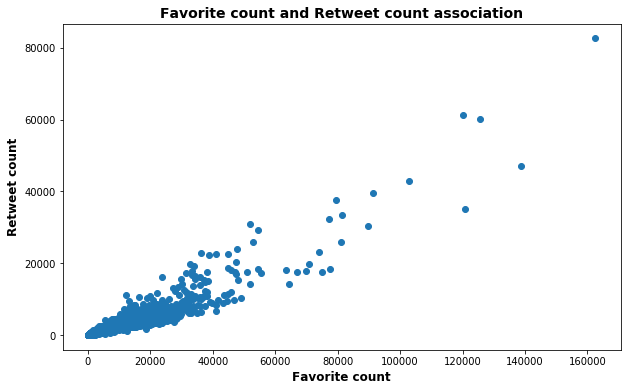

In [745]:
plt.figure(figsize=(10,6))
plt.scatter(clean_t_master_df.favorite_count,clean_t_master_df.retweet_count);
plt.title('Favorite count and Retweet count association',fontsize=14,fontweight='bold')
plt.xlabel('Favorite count',fontsize=12,fontweight='bold')
plt.ylabel('Retweet count',fontsize=12,fontweight='bold');

#### As expected, Favorite count and Retweet count have a strong association

#### Association between Rating and Favorite count
Rating = Rating numerator / Rating denominator

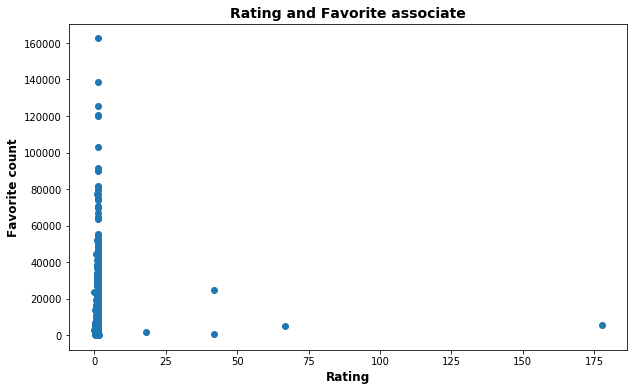

In [916]:
plt.figure(figsize=(10,6))
plt.scatter(clean_t_master_df.rating_numerator/clean_t_master_df.rating_denominator,clean_t_master_df.favorite_count);
plt.title('Rating and Favorite associate',fontsize=14,fontweight='bold')
plt.xlabel('Rating',fontsize=12,fontweight='bold')
plt.ylabel('Favorite count',fontsize=12,fontweight='bold');


#### The above diagram shows that there's no association between Rating and Favorite counts

#### Association between Rating and Retweet count
Rating = Rating numerator / Rating denominator

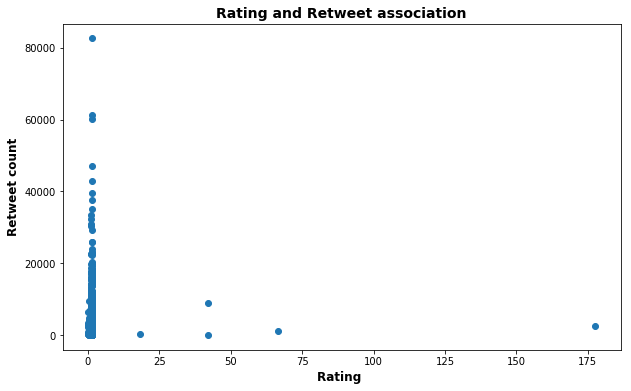

In [917]:
plt.figure(figsize=(10,6))
plt.scatter(clean_t_master_df.rating_numerator/clean_t_master_df.rating_denominator,clean_t_master_df.retweet_count);
plt.title('Rating and Retweet association',fontsize=14,fontweight='bold')
plt.xlabel('Rating ',fontsize=12,fontweight='bold')
plt.ylabel('Retweet count',fontsize=12,fontweight='bold');

#### The above diagram shows that there's no association between Rating and Retweet counts. This clearly shows that how much the crowd likes the dog doesn't depend on the Ratings given by WeRateDogs.

### Looking at how favorite count changes for different dog stage

In [937]:
clean_t_master_df.dog_stage.value_counts()

unavailable      1819
pupper            226
doggo              82
puppo              26
floofer            10
doggo, pupper       6
Name: dog_stage, dtype: int64

#### Though the number of records with dog stage indentified is low, roughly 16%, it worths finding out which dog stage would have high favorite count and retweet count as it maybe helpful to WeRateDogs to select which dog photo submission to tweet about.  This is in case WeRateDogs wants their tweets to have high favorite count and retweet count.

In [919]:
clean_t_master_df.groupby(['dog_stage'])['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,82.0,17135.365854,24140.050879,722.0,6128.25,10896.5,17492.00,162471.0
"doggo, pupper",6.0,15125.000000,17582.711236,6244.0,7134.75,8392.5,9670.50,50909.0
floofer,10.0,11086.700000,9757.823027,1513.0,4147.75,8177.0,15227.75,31582.0
pupper,226.0,6935.022124,10820.026032,251.0,2294.00,3182.0,7508.00,120694.0
puppo,26.0,21928.269231,27724.340648,1517.0,6664.25,15299.5,22450.25,138827.0
unavailable,1819.0,8036.067070,11204.774838,51.0,1587.50,3610.0,10176.50,125587.0


#### In the above statistics, there are outliners for pupper, puppo, doggo & unavailable, hence Median will be used

In [734]:
grouped_stage_fav = clean_t_master_df.groupby(['dog_stage'])['favorite_count'].median()

In [920]:
grouped_stage_fav

dog_stage
doggo            10896.5
doggo, pupper     8392.5
floofer           8177.0
pupper            3182.0
puppo            15299.5
unavailable       3610.0
Name: favorite_count, dtype: float64

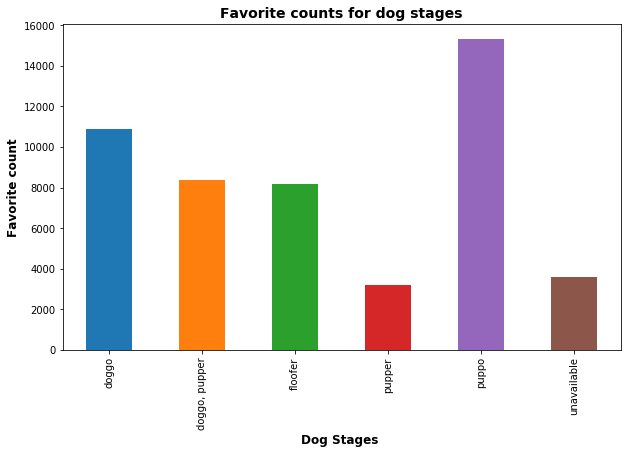

In [921]:

plt.figure(figsize=(10,6))
grouped_stage_fav.plot.bar()
plt.title('Favorite counts for dog stages',fontsize=14,fontweight='bold')
plt.xlabel('Dog Stages ',fontsize=12,fontweight='bold')
plt.ylabel('Favorite count',fontsize=12,fontweight='bold');

#### From the above diagram, puppo has the highest favorite_count, followed by doggo.

In [922]:
 clean_t_master_df.groupby(['dog_stage'])['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,82.0,5916.585366,12023.619691,30.0,1828.50,2684.5,4628.50,82633.0
"doggo, pupper",6.0,4929.000000,6277.937082,1481.0,2115.75,2562.0,3129.00,17684.0
floofer,10.0,3807.400000,4899.016255,465.0,1291.25,2698.0,3497.75,17186.0
pupper,226.0,2312.964602,3659.123965,25.0,643.00,1167.5,2330.25,35023.0
puppo,26.0,6460.269231,9596.774160,166.0,1589.75,3008.5,7467.75,47117.0
unavailable,1819.0,2421.648158,3894.050747,1.0,521.50,1184.0,2807.50,60273.0


#### In the above statistics, there are outliners for doggo, pupper, and unavailable, hence Median will be used

In [923]:
grouped_stage_retweet = clean_t_master_df.groupby(['dog_stage'])['retweet_count'].median()

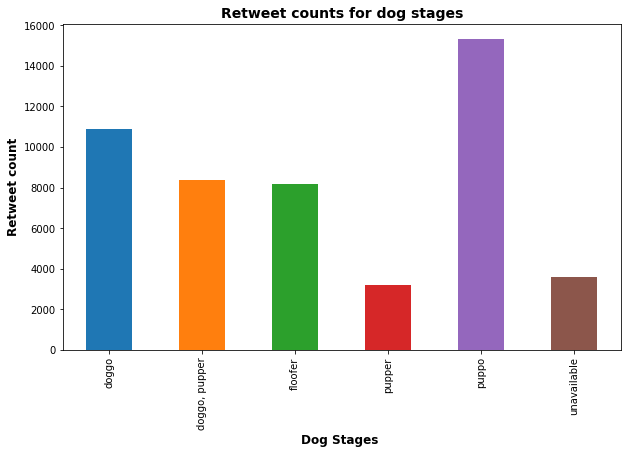

In [924]:

plt.figure(figsize=(10,6))
grouped_stage_fav.plot.bar()
plt.title('Retweet counts for dog stages',fontsize=14,fontweight='bold')
plt.xlabel('Dog Stages ',fontsize=12,fontweight='bold')
plt.ylabel('Retweet count',fontsize=12,fontweight='bold');

#### From the above diagram, puppo has the highest retweet_count, followed by floofer.  So, puppo has the highest favorite count and retweet count.



In [925]:
clean_t_master_df.favorite_count.describe()

count      2169.000000
mean       8465.547718
std       12439.563915
min          51.000000
25%        1803.000000
50%        3816.000000
75%       10546.000000
max      162471.000000
Name: favorite_count, dtype: float64

In [926]:
clean_t_master_df.retweet_count.describe()

count     2169.000000
mean      2604.187644
std       4627.175730
min          1.000000
25%        560.000000
50%       1246.000000
75%       2961.000000
max      82633.000000
Name: retweet_count, dtype: float64

In [927]:
#Top 10 breeds of dog that have favorite count > = 10546 which is the 75 percentile
clean_t_master_df[clean_t_master_df.favorite_count >= 10546]['predict_breed'].value_counts().head(10)

golden_retriever      64
Labrador_retriever    36
Pembroke              34
Chihuahua             19
Samoyed               16
French_bulldog        15
cocker_spaniel        13
chow                  11
toy_poodle             9
pug                    9
Name: predict_breed, dtype: int64

In [928]:
#Top 10 breeds of dog that have retweet count >= 2961 which is the 75 percentile
clean_t_master_df[clean_t_master_df.retweet_count >= 2961]['predict_breed'].value_counts().head(10)

golden_retriever      59
Labrador_retriever    36
Pembroke              34
Chihuahua             22
Samoyed               18
pug                   13
French_bulldog        13
chow                  12
cocker_spaniel        12
toy_poodle            10
Name: predict_breed, dtype: int64

#### The 2 lists above show that the same 10 breeds have both high favorite count and retweet count.


### Insights Conclusion:
The following insights have been drawn from the archive WeRateDogs tweets collected from 2015-11-15 to 2017-08-01, and the predicted dog breed based on the image.
- As expected, Favorite count and Retweet count have strong positive association.
- There's no association between Rating and Retweet counts, and no association between Rating and Favorite counts. This clearly shows that how much the crowd likes the dog doesn't depend on the Rating given by WeRateDogs.
- Dogs at Puppo stage has the highest favorite count and retweet count. It worths finding out which dog stage would have high favorite count and retweet count as it maybe helpful to WeRateDogs to select which dog photo submission to tweet about.  This is in case WeRateDogs wants their tweets to have high favorite count and retweet count. However, the number of records with dog stage indentified is low, roughly 16%, so this insight may not be accurate.
- The following 10 breeds of dog have both highest favorite count and retweet count
golden_retriever      
Labrador_retriever    
Pembroke              
Chihuahua            
Samoyed               
pug                   
French_bulldog        
chow                  
cocker_spaniel        
toy_poodle            


In [1123]:
clean_t_master_df[(clean_t_master_df.dog_stage == 'puppo') & (clean_t_master_df.predict_breed == 'Labrador_retriever')]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,predict_breed
514,793195938047070209,2016-10-31 21:00:23,Say hello to Lily. She's pupset that her costume doesn't fit as well as last year. 12/10 poor puppo,https://twitter.com/dog_rates/status/793195938047070209/photo/1,12.0,10,Lily,puppo,16209.0,6108.0,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,2.0,Labrador_retriever
768,752519690950500352,2016-07-11 15:07:30,Hopefully this puppo on a swing will help get you through your Monday. 11/10 would push,https://twitter.com/dog_rates/status/752519690950500352/photo/1,11.0,10,None,puppo,7694.0,3675.0,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3.0,Labrador_retriever
781,751132876104687617,2016-07-07 19:16:47,This is Cooper. He's just so damn happy. 10/10 what's your secret puppo?,https://twitter.com/dog_rates/status/751132876104687617/photo/1,10.0,10,Cooper,puppo,5289.0,1382.0,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1.0,Labrador_retriever
